In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dabl
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_sem_cancel = pd.read_csv('CartaoCredito_semtarget.csv')
df_cancel = pd.read_csv('CartaoCredito_cancelamento.csv')

In [3]:
df_sem_cancel.shape, df_cancel.shape

((891, 14), (300, 14))

In [4]:
# Adicionar os Targets
df_sem_cancel['Target'] = 0
df_cancel['Target'] = 1

In [5]:
df_sem_cancel.head()

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,1,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242,5,"62,9304011407",0
1,2,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737,7,"37,9153459043",0
2,3,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282,6,"60,9993188527",0
3,4,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571,7,"5,3944383134",0
4,5,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333,0,"40,9964747337",0


In [6]:
df_cancel.head()

,ID,PerfilEconomico,Sexo,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,MesesDesempregado,Anuidade,Target
0,180,2,mulher,24,2,1875,133.928571,156.250000,MA,Centro Novo do Maranhão,Região Nordeste,13.020833,2,"251,1938708281",1
1,119,3,mulher,22,0,725,51.785714,60.416667,PI,Amarante,Região Nordeste,5.492424,13,"233,5439410115",1
2,274,3,homem,22,0,72292,5163.714286,6024.333333,MT,Santo Antônio do Leverger,Região Centro-Oeste,547.666667,2,"275,4369442974",1
3,107,3,homem,22,1,155,11.071429,12.916667,PR,Quitandinha,Região Sul,1.174242,13,"2,0031106899",1
4,37,2,mulher,15,1,26,1.857143,2.166667,SP,Nova Campina,Região Sudeste,0.288889,7,"249,3346886075",1


In [7]:
# Concatenar as bases
df = pd.concat([df_cancel, df_sem_cancel])

In [8]:
df.shape

(1191, 15)

In [9]:
df.describe()

,ID,PerfilEconomico,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline,MesesDesempregado,Target
count,1191.000000,1191.000000,1191.000000,1191.000000,1.163000e+03,1191.000000,1191.000000,1.191000e+03,1191.000000,1191.000000
mean,371.566751,2.294710,30.273720,0.527288,1.080341e+05,7834.604654,9140.372096,6.680638e+04,5.094878,0.251889
std,260.563598,0.840946,12.360032,1.078773,3.667945e+05,26481.770183,30895.398547,1.404381e+06,3.484935,0.434280
min,1.000000,1.000000,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,149.500000,2.000000,22.000000,0.000000,1.670000e+02,11.714286,13.666667,1.159722e+00,2.000000,0.000000
50%,298.000000,3.000000,26.000000,0.000000,2.625000e+03,187.500000,218.750000,1.321429e+01,5.000000,0.000000
75%,593.500000,3.000000,36.000000,1.000000,7.866700e+04,5610.142857,6545.166667,5.599739e+02,8.000000,1.000000
max,891.000000,3.000000,92.000000,8.000000,5.123292e+06,365949.428571,426941.000000,3.410762e+07,14.000000,1.000000


In [10]:
df.isnull().sum()

ID                      0
PerfilEconomico         0
Sexo                    0
Idade                   0
PerfilCompra            0
ValorCompraAnual       28
GastoMax                0
GastoMedio              0
UF                      0
CidadeResidencia        0
RegiaodoPais            0
NumeroComprasOnline     0
MesesDesempregado       0
Anuidade                0
Target                  0
dtype: int64

In [11]:
# Substituir valores nan pela média da respectiva coluna
df.ValorCompraAnual.fillna(df.ValorCompraAnual.mean(), inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 0 to 890
Data columns (total 15 columns):
ID                     1191 non-null int64
PerfilEconomico        1191 non-null int64
Sexo                   1191 non-null object
Idade                  1191 non-null int64
PerfilCompra           1191 non-null int64
ValorCompraAnual       1191 non-null float64
GastoMax               1191 non-null float64
GastoMedio             1191 non-null float64
UF                     1191 non-null object
CidadeResidencia       1191 non-null object
RegiaodoPais           1191 non-null object
NumeroComprasOnline    1191 non-null float64
MesesDesempregado      1191 non-null int64
Anuidade               1191 non-null object
Target                 1191 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 148.9+ KB


In [13]:
df.drop(columns=['ID'], inplace=True)

In [14]:
# Para transformar o formato da coluna 'Anuidade', é necessário primeiro trocar a vírgula pelo ponto.
import re
df.Anuidade = df.Anuidade.map(lambda x: re.sub(',', '.', x))
df.Anuidade = pd.to_numeric(df.Anuidade).astype(float)

Target looks like classification
Linear Discriminant Analysis training set score: 0.792


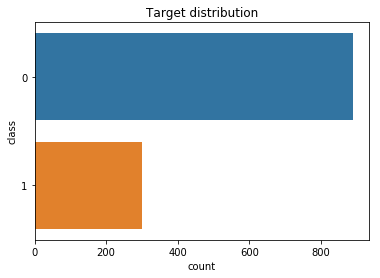

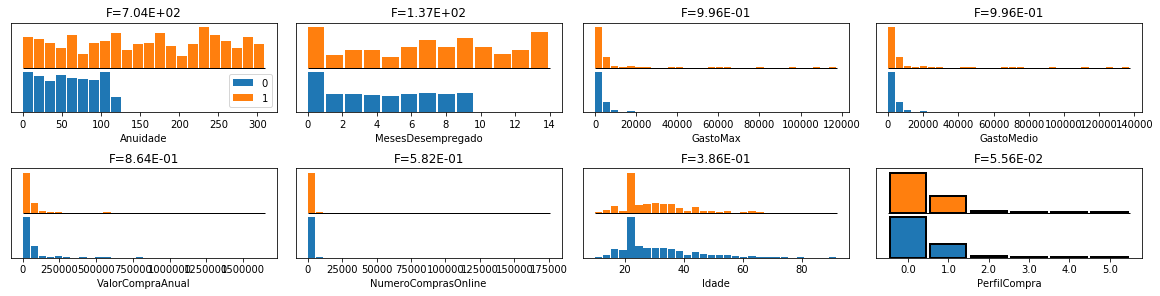

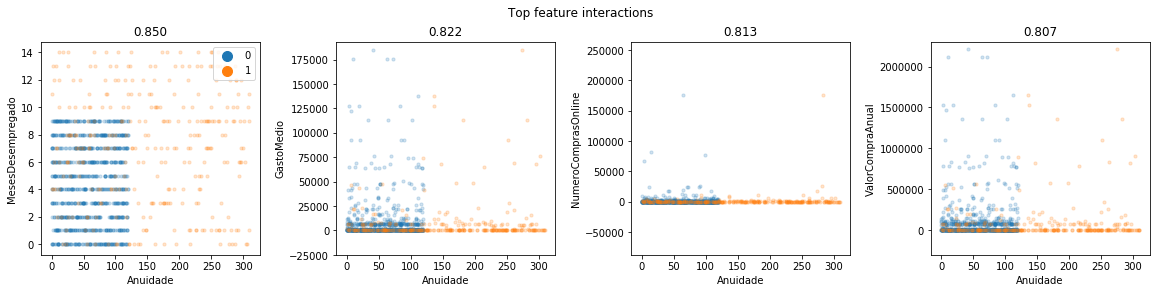

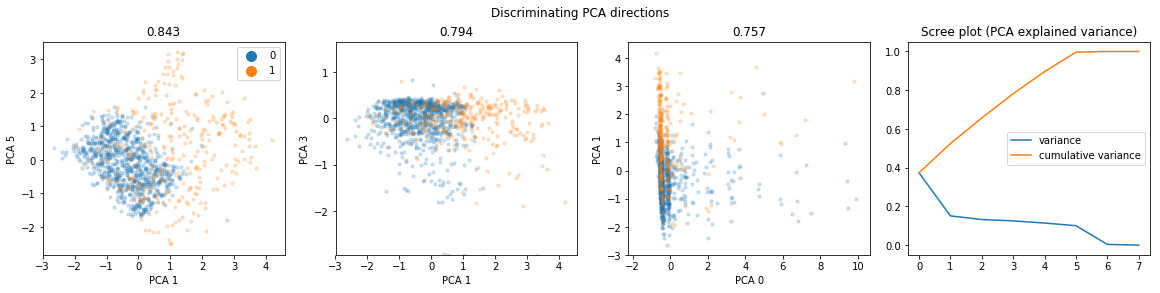

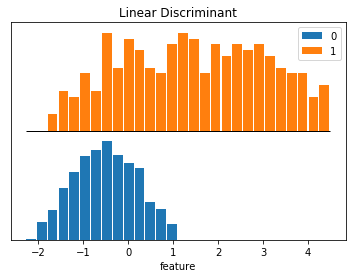

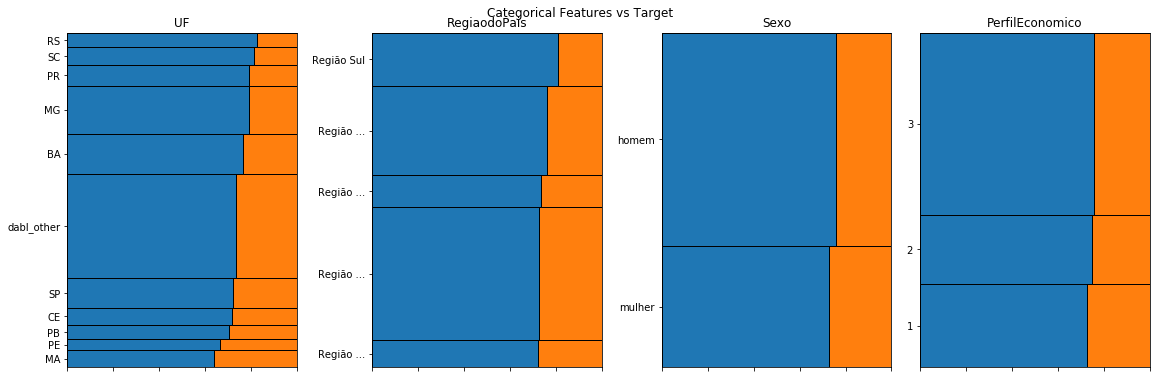

In [16]:
dabl.plot(df, 'Target')

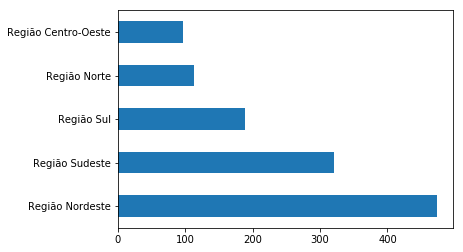

In [14]:
df.RegiaodoPais.value_counts().plot(kind='barh')

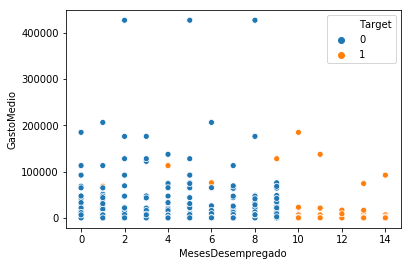

In [15]:
sns.scatterplot(y='GastoMedio', x='MesesDesempregado', data=df, hue='Target')

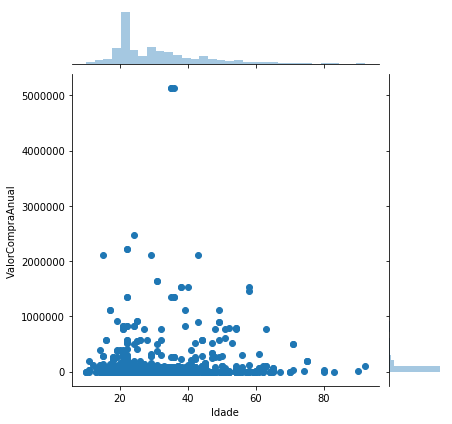

In [16]:
sns.jointplot(x='Idade', y='ValorCompraAnual', data=df)

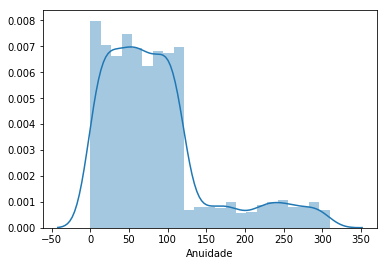

In [18]:
sns.distplot(df.Anuidade)

In [19]:
df.columns

Index(['PerfilEconomico', 'Sexo', 'Idade', 'PerfilCompra', 'ValorCompraAnual',
       'GastoMax', 'GastoMedio', 'UF', 'CidadeResidencia', 'RegiaodoPais',
       'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'Target'],
      dtype='object')

In [20]:
# Faremos dummies para variáveis com granularidade menor que 10
df = pd.get_dummies(df, columns=['PerfilEconomico', 'Sexo', 'RegiaodoPais'], drop_first=True)

In [21]:
# Faremos label encoder para variáveis com granularidade maior que 10
from sklearn.preprocessing import LabelEncoder

In [22]:
label = LabelEncoder()

In [23]:
label_1 = label.fit_transform(df.UF)
df.UF = pd.DataFrame(label_1)

label_2 = label.fit_transform(df.CidadeResidencia)
df.CidadeResidencia = pd.DataFrame(label_2)

In [24]:
df.head()

,Idade,PerfilCompra,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,NumeroComprasOnline,MesesDesempregado,Anuidade,Target,PerfilEconomico_2,PerfilEconomico_3,Sexo_mulher,RegiaodoPais_Região Nordeste,RegiaodoPais_Região Norte,RegiaodoPais_Região Sudeste,RegiaodoPais_Região Sul
0,24,2,1875.0,133.928571,156.250000,8,193,13.020833,2,251.193871,1,1,0,1,1,0,0,0
1,22,0,725.0,51.785714,60.416667,15,26,5.492424,13,233.543941,1,0,1,1,1,0,0,0
2,22,0,72292.0,5163.714286,6024.333333,11,694,547.666667,2,275.436944,1,0,1,0,0,0,0,0
3,22,1,155.0,11.071429,12.916667,16,620,1.174242,13,2.003111,1,0,1,0,0,0,0,1
4,15,1,26.0,1.857143,2.166667,24,505,0.288889,7,249.334689,1,1,0,1,0,0,1,0


In [25]:
df.shape

(1191, 18)

# Seleção de Variáveis

In [26]:
# Dividimos a base em duas. Em X temos as variáveis explicativas e em y o target.
X = df.drop(columns=['Target'])
y = df.Target

### Chi2

In [27]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [28]:
X_norm = MinMaxScaler().fit_transform(X)

In [29]:
chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_norm, y)

chi2_support = chi2_selector.get_support()

chi2_feature = X.loc[: ,chi2_support].columns.tolist()
print(str(len(chi2_feature)), 'variáveis selecionadas:')
print(str(chi2_feature))

10 variáveis selecionadas:
['GastoMax', 'GastoMedio', 'NumeroComprasOnline', 'MesesDesempregado', 'Anuidade', 'PerfilEconomico_3', 'Sexo_mulher', 'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul']


### RFE

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [31]:
rfe_selector = RFE(estimator=LogisticRegression(), step=2)
rfe_selector.fit(X, y)

rfe_support = rfe_selector.get_support()

rfe_feature = X.loc[: ,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'variáveis selecionadas:')
print(str(rfe_feature))

8 variáveis selecionadas:
['MesesDesempregado', 'PerfilEconomico_2', 'PerfilEconomico_3', 'Sexo_mulher', 'RegiaodoPais_Região Nordeste', 'RegiaodoPais_Região Norte', 'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Sul']


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [33]:
rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=10, criterion='entropy'))
rf_selector.fit(X, y)

rf_support = rf_selector.get_support()

rf_feature = X.loc[: ,rf_support].columns.tolist()
print(str(len(rf_feature)), 'variáveis selecionadas:')
print(str(rf_feature))

2 variáveis selecionadas:
['MesesDesempregado', 'Anuidade']


In [34]:
feature_selection_df = pd.DataFrame({'Variáveis': X.columns,
                                 'chi2': chi2_support,
                                 'RFE': rfe_support,
                                 'Random Forest': rf_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total', 'Variáveis'], ascending=False)
feature_selection_df.head(15)

,Variáveis,chi2,RFE,Random Forest,Total
8,MesesDesempregado,True,True,True,3
12,Sexo_mulher,True,True,False,2
16,RegiaodoPais_Região Sul,True,True,False,2
15,RegiaodoPais_Região Sudeste,True,True,False,2
13,RegiaodoPais_Região Nordeste,True,True,False,2
11,PerfilEconomico_3,True,True,False,2
9,Anuidade,True,False,True,2
14,RegiaodoPais_Região Norte,False,True,False,1
10,PerfilEconomico_2,False,True,False,1
7,NumeroComprasOnline,True,False,False,1


In [35]:
# Tomaremos as colunas que aparecem 2 ou 3 vezes de acordo com os algoritmos acima
my_features = feature_selection_df[(feature_selection_df.Total == 3) | (feature_selection_df.Total == 2)]['Variáveis'].to_list()
len(my_features)

7

In [36]:
print(my_features)

['MesesDesempregado', 'Sexo_mulher', 'RegiaodoPais_Região Sul', 'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Nordeste', 'PerfilEconomico_3', 'Anuidade']


In [37]:
expl = df[['MesesDesempregado', 'Sexo_mulher', 'RegiaodoPais_Região Sul', 'RegiaodoPais_Região Sudeste', 'RegiaodoPais_Região Nordeste', 'PerfilEconomico_3', 'Anuidade']]

In [38]:
# Dividimos aleatoriamente as bases em treino e teste. Com a base de treino fazemos modelos e com as base de teste verificamos qual teve o melhor desempenho de acordo com a métrica demandada.
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(expl, y, random_state=34)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((893, 7), (298, 7), (893,), (298,))

# Análise

Esse trabalho quer prever quais clientes irão cancelar o cartão (Target == 1)

Precisamos então saber quais clientes podem ser potenciais alvos em campanhas de retenção

A métrica Recall vê quais realmente calcelaram em relação ao predito. Quanto maior o Recall maior será o potencial de retenção

In [41]:
# Com o GridSearchCV podemos testar qual a melhor combinação de Hyperparâmetros para os respectivos algoritmos
from sklearn.model_selection import GridSearchCV

### Regressão Logística

In [42]:
rl = LogisticRegression()

In [43]:
param_grid_rl = {'penalty': ['l1', 'l2'], 'C': [0.001,.009,0.01,.09,1,5,10,25]}

In [44]:
grid_rl = GridSearchCV(estimator=rl, param_grid=param_grid_rl, scoring='recall', cv=5)

grid_rl.fit(X_train, y_train)

C:\Users\RobertoMegumi\Anaconda33\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [45]:
grid_rl.best_params_

{'C': 5, 'penalty': 'l2'}

### Random Forest

In [46]:
rf = RandomForestClassifier()

In [47]:
param_grid_rf = {'n_estimators': [10, 20, 50, 100, 200, 500],
             'criterion': ['gini', 'entropy'],
             'bootstrap': [True, False]}

In [48]:
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='recall', cv=5)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [49]:
grid_rf.best_params_

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 20}

### Gradient Boost Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc = GradientBoostingClassifier()

In [52]:
param_grid_gbc = {
    'min_samples_split': [0.1, 0.5, 1.0, 3, 5],
    'min_samples_leaf': [0.1, 0.5],
    'max_depth': [2,3,5,10],
    'n_estimators':[2,5,10,15]}

In [53]:
grid_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, scoring='recall', cv=5)

grid_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': [0.1, 0.5, 1.0, 3, 5], 'min_samples_leaf': [0.1, 0.5], 'max_depth': [2, 3, 5, 10], 'n_estimators': [2, 5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [54]:
grid_gbc.best_params_

{'max_depth': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 5}

# Resultados

O Recall que queremos é o do Target igual a 1

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Regressão Logística

In [56]:
y_pred_rl_test = grid_rl.predict(X_test)
y_pred_rl_train = grid_rl.predict(X_train)

In [57]:
print(classification_report(y_pred_rl_test, y_test))
print(confusion_matrix(y_pred_rl_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       252
           1       0.59      0.96      0.73        46

   micro avg       0.89      0.89      0.89       298
   macro avg       0.79      0.92      0.83       298
weighted avg       0.93      0.89      0.90       298

[[222  30]
 [  2  44]]


In [58]:
print(round(accuracy_score(y_pred_rl_test, y_test), 2))
print(round(accuracy_score(y_pred_rl_train, y_train), 2))

0.89
0.89


### Random Forest

In [59]:
y_pred_rf_test = grid_rf.predict(X_test)
y_pred_rf_train = grid_rf.predict(X_train)

In [60]:
print(classification_report(y_pred_rf_test, y_test))
print(confusion_matrix(y_pred_rf_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       238
           1       0.72      0.88      0.79        60

   micro avg       0.91      0.91      0.91       298
   macro avg       0.84      0.90      0.87       298
weighted avg       0.92      0.91      0.91       298

[[217  21]
 [  7  53]]


In [61]:
print(accuracy_score(y_pred_rf_test, y_test))
print(accuracy_score(y_pred_rf_train, y_train))

0.9060402684563759
1.0


### Gradient Boost

In [62]:
y_pred_gbc_test = grid_gbc.predict(X_test)
y_pred_gbc_train = grid_gbc.predict(X_train)

In [63]:
print(classification_report(y_pred_gbc_test, y_test))
print(confusion_matrix(y_pred_gbc_test, y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       253
           1       0.61      1.00      0.76        45

   micro avg       0.90      0.90      0.90       298
   macro avg       0.80      0.94      0.85       298
weighted avg       0.94      0.90      0.91       298

[[224  29]
 [  0  45]]


In [64]:
print(accuracy_score(y_pred_gbc_test, y_test))
print(accuracy_score(y_pred_gbc_train, y_train))

0.9026845637583892
0.9036954087346024


O Recall do Gradient Boost Classifier foi 1.00, sem nenhum falso positivo

In [65]:
from sklearn.externals import joblib

joblib.dump(grid_gbc.best_estimator_, 'modelo_gbc_cancelamento.pkl', compress=1)

['modelo_gbc_cancelamento.pkl']